In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

start1 = dt.datetime(2019, 1, 1)
end1 = dt.datetime(2019, 12, 31)

prices = web.DataReader('AAPL', 'yahoo', start=start1, end=end1)['Close']
returns = prices.pct_change()

last_price = prices[-1]

#number of simulations
num_simulations  = 1000
num_days = 252

simulations_df = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()

    price_series = []

    price = last_price*(1 + np.random.normal(0, daily_vol))
    price_series.append(price)

    for y in range(num_days):
        if  count ==251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    simulations_df[x] = price_series


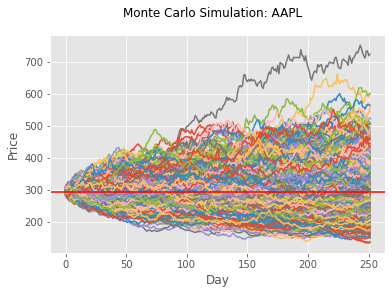

In [3]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulations_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()